In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr

%matplotlib inline

#### Example 1: load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [2]:
%%time
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,4,1) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results/SalishSea/nowcast-green.201812/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                paths        t_0        t_n
0   /results/SalishSea/nowcast-green.201812/01mar1... 2017-03-01 2017-03-02
1   /results/SalishSea/nowcast-green.201812/02mar1... 2017-03-02 2017-03-03
2   /results/SalishSea/nowcast-green.201812/03mar1... 2017-03-03 2017-03-04
3   /results/SalishSea/nowcast-green.201812/04mar1... 2017-03-04 2017-03-05
4   /results/SalishSea/nowcast-green.201812/05mar1... 2017-03-05 2017-03-06
5   /results/SalishSea/nowcast-green.201812/06mar1... 2017-03-06 2017-03-07
6   /results/SalishSea/nowcast-green.201812/07mar1... 2017-03-07 2017-03-08
7   /results/SalishSea/nowcast-green.201812/08mar1... 2017-03-08 2017-03-09
8   /results/SalishSea/nowcast-green.201812/09mar1... 2017-03-09 2017-03-10
9   /results/SalishSea/nowcast-green.201812/10mar1... 2017-03-10 2017-03-11
10  /results/SalishSea/nowcast-green.201812/11mar1... 2017-03-11 2017-03-12
11  /results/SalishSea/nowcast-green.201812/12mar1... 2017-03-12 2017-03-13
12  /results

In [3]:
# reminder of variable names in ptrc files:
with nc.Dataset(flist.loc[0,['paths']].values[0]) as ff: #  <-when you access elements of a pandas array, sometimes
                                                         #    you get an array output, even if it only contains one
                                                         #    element. To get the element rather than the array 
                                                         #     containing it, use [0]
    print(ff.variables.keys())
    # also grab time reference:
    torig=dt.datetime.strptime(ff.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print('time origin:',torig)

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'Fraser_tracer', 'mesozooplankton'])
time origin: 1900-01-01 00:00:00


In [4]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level


In [5]:
bio=xr.open_mfdataset(flist['paths'])

In [6]:
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 32, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2017-03-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20170301_20170310
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-11 10:18:36 GMT
    uuid:         8082bc6c-e5cf-46f8-a8ce-8e6f05c20614

In [7]:
%%time
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.65 ms


CPU times: user 8.96 s, sys: 1.45 s, total: 10.4 s
Wall time: 15.5 s


(17226.5, 17257.5)

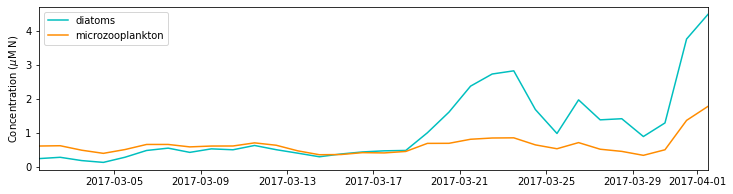

In [8]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [9]:
bio.close()

### repeat with hourly data over a shorter interval

In [11]:
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,5) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
tres=1 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
flist['paths'][0]

'/results/SalishSea/nowcast-green.201812/01mar17/SalishSea_1h_20170301_20170301_ptrc_T.nc'

In [12]:
%%time
bio=xr.open_mfdataset(flist['paths'])
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)

CPU times: user 192 ms, sys: 24 ms, total: 216 ms
Wall time: 945 ms


CPU times: user 33.6 s, sys: 5.94 s, total: 39.5 s
Wall time: 41.8 s


(17226.020833333332, 17230.979166666668)

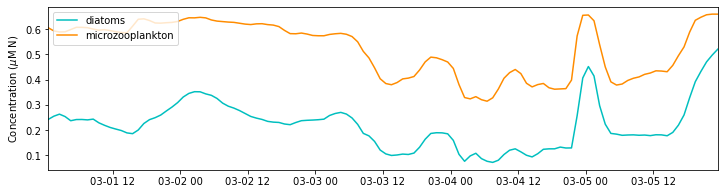

In [13]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [14]:
bio.close()

### repeat but now using ERDDAP and xarray to access version 1905 model output

In [15]:
%%time
hc1905 = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 77.7 ms


In [16]:
%%time
hc1905

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


<xarray.Dataset>
Dimensions:                       (depth: 40, gridX: 398, gridY: 898, time: 122520)
Coordinates:
  * time                          (time) datetime64[ns] 2007-01-01T00:30:00 ....
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int16 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int16 0 1 2 3 4 ... 394 395 396 397
Data variables:
    ammonium                      (time, depth, gridY, gridX) float32 ...
    biogenic_silicon              (time, depth, gridY, gridX) float32 ...
    ciliates                      (time, depth, gridY, gridX) float32 ...
    diatoms                       (time, depth, gridY, gridX) float32 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 ...
    flagellates                   (time, depth, gridY, gridX) float32 ...
    mesozooplankton               (time, depth, gridY, gridX) float32 ...
    microzooplankton              (time, depth, gridY, gridX) float32 ...
    nitrate                       (time, depth, gridY, gridX) float32 ...
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 ...
    silicon                       (time, depth, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    comment:                   If you use this dataset in your research,\nple...
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthedocs.io/
    description:               biogeochemical variables
    drawLandMask:              over
    history:                   2020-12-22T21:40:19Z (local files)\n2020-12-22...
    infoUrl:                   https://salishsea-meopar-docs.readthedocs.io/e...
    institution:               UBC EOAS
    institution_fullname:      Earth, Ocean & Atmospheric Sciences, Universit...
    keywords:                  ammonia, ammonium, aquatic, biogenic, biogenic...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The Salish Sea MEOPAR NEMO model results are c...
    project:                   Salish Sea MEOPAR NEMO Model
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Green, Salish Sea, 3d Biology Fields, Hourly, ...
    testOutOfDate:             now-16hours
    time_coverage_end:         2020-12-22T23:30:00Z
    time_coverage_start:       2007-01-01T00:30:00Z
    timeStamp:                 2020-Dec-22 17:15:12 GMT
    title:                     Green, Salish Sea, 3d Biology Fields, Hourly, ...
    uuid:                      d4b39547-de38-4137-bdf0-f7e9b960aaa9

In [17]:
%%time
modt=hc1905.time.sel(time=slice(start,end))
micZ1905=hc1905.microzooplankton.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)
diat1905=hc1905.diatoms.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.59 ms


CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.3 ms


(17226.020833333332, 17229.979166666668)

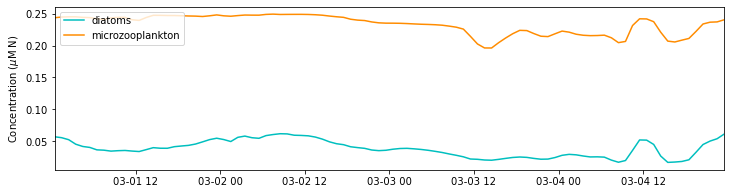

In [20]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(modt,diat1905,'c-',label='diatoms')
ax.plot(modt,micZ1905,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(modt[0],modt[-1]);

In [19]:
hc1905.close()